In [1]:
import sys
import os
sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('__file__'))))
import jReversion as jR
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, balanced_accuracy_score
import networkx as nx
from statannot import add_stat_annotation

In [2]:
networkModel =['bortezomib',
                # 'igvh',
                'apoptosis',
                # 'aurora',
                'bt474_long',
                'bt474_short',
                # 'cd4t',
                'colitis',
                'death',
                # 'egfr',
                # 'erbb',
                # 'fa_brca',
                # 'fa_check',
                'hcc1954_long',
                'hcc1954_short',
                'hgf',
                'mammalian',
                # 'mammalian_2006',
                'mapk',
                'oxidative',
                # 'pro_inflammatory',
                'fibroblasts',
                'skbr3_long',
                'skbr3_short',
                'tlgl_2008',
                'tlgl_2011',
                # 'tlgl_2011_reduced',
                # 'prostate',
                'migration']

In [3]:
Prefix, Suffix = 'n', 'n'
TEMP = jR.cellcollective(networkModel[0], Prefix, Suffix, directory='../')

BooleanRuleFileName = TEMP['BooleanRule_filename']
network_name = TEMP['network_name']

NumInputs = TEMP['num_inputs']
NumInputConditions = TEMP['num_input_conditions']

InputConditions = TEMP['input_conditions']

OutputNodes = TEMP['output_nodes']
InputNodes = TEMP['input_nodes']

Mapping = TEMP['mapping']
InverseMapping = TEMP['inverse_mapping']
GRead = TEMP['Gread']
ReadNodes = TEMP['read_nodes']

#     CutOffRange = [3, 4, 5, 6, 7]
GRead.remove_edges_from(list(nx.selfloop_edges(GRead)))

# table_original_network = pd.read_csv('../data/' + network_name + '_table_for_original_network.tsv', sep='\t').sort_values(by='node').set_index('node')

# GLabel = nx.DiGraph()
# GLabel.add_edges_from(GRead.edges())
# GLabel = nx.relabel_nodes(GLabel, ReadNodes)


integrated_data = pd.read_csv('../data/' + network_name + '_table_for_original_network.tsv', sep='\t').sort_values(by='node').set_index('node')
# table_original_network = table_original_network.sort_values(by='node')
# ffl_test = pd.read_csv('../data/' + network_name + '_ffl_test.tsv', sep='\t').sort_values(by='node').set_index('node')
# canalizing_test = pd.read_csv('../data/' + network_name + '_canalizing_check_for_original_network.tsv', sep='\t').sort_values(by='node').set_index('node')

#     print(table_original_network.head())
GLabel = nx.DiGraph()
GLabel.add_edges_from(GRead.edges())
GLabel = nx.relabel_nodes(GLabel, ReadNodes)
indegree_srs = pd.Series(nx.in_degree_centrality(GLabel))
#     indegree_srs = pd.Series(dict(GLabel.in_degree))
integrated_data['indegree'] = indegree_srs
outdegree_srs = pd.Series(nx.out_degree_centrality(GLabel))
#     outdegree_srs = pd.Series(dict(GLabel.out_degree))
integrated_data['outdegree'] = outdegree_srs
betweenness_srs = pd.Series(nx.betweenness_centrality(GLabel))
integrated_data['betweenness'] = betweenness_srs
closeness_srs = pd.Series(nx.closeness_centrality(GLabel))
integrated_data['closeness'] = closeness_srs
katz_srs = pd.Series(nx.katz_centrality(GLabel))
integrated_data['katz'] = katz_srs
integrated_data['network'] = network_name
integrated_data.reset_index(inplace=True)
#     print(table_original_network.head())

In [4]:
#cell collective
# networkModel = ['BT474', 'CD4_T', 'death_receptor', 'bortezomib', 'lymphoid']

for Model in networkModel[1:]:
    Prefix, Suffix = 'n', 'n'
    TEMP = jR.cellcollective(Model, Prefix, Suffix, directory='../')

    BooleanRuleFileName = TEMP['BooleanRule_filename']
    network_name = TEMP['network_name']

    NumInputs = TEMP['num_inputs']
    NumInputConditions = TEMP['num_input_conditions']

    InputConditions = TEMP['input_conditions']

    OutputNodes = TEMP['output_nodes']
    InputNodes = TEMP['input_nodes']
    
    Mapping = TEMP['mapping']
    InverseMapping = TEMP['inverse_mapping']
    GRead = TEMP['Gread']
    ReadNodes = TEMP['read_nodes']
    
#     CutOffRange = [3, 4, 5, 6, 7]
    GRead.remove_edges_from(list(nx.selfloop_edges(GRead)))

    table_original_network = pd.read_csv('../data/' + network_name + '_table_for_original_network.tsv', sep='\t').sort_values(by='node').set_index('node')
    
    GLabel = nx.DiGraph()
    GLabel.add_edges_from(GRead.edges())
    GLabel = nx.relabel_nodes(GLabel, ReadNodes)
    indegree_srs = pd.Series(nx.in_degree_centrality(GLabel))
#     indegree_srs = pd.Series(dict(GLabel.in_degree))
    table_original_network['indegree'] = indegree_srs
    outdegree_srs = pd.Series(nx.out_degree_centrality(GLabel))
#     outdegree_srs = pd.Series(dict(GLabel.out_degree))
    table_original_network['outdegree'] = outdegree_srs
    betweenness_srs = pd.Series(nx.betweenness_centrality(GLabel))
    table_original_network['betweenness'] = betweenness_srs
    closeness_srs = pd.Series(nx.closeness_centrality(GLabel))
    table_original_network['closeness'] = closeness_srs
    katz_srs = pd.Series(nx.katz_centrality(GLabel))
    table_original_network['katz'] = katz_srs
    table_original_network['network'] = network_name
    table_original_network.reset_index(inplace=True)
    integrated_data = pd.concat([integrated_data, table_original_network], ignore_index=True)
    
    

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

C0 v.s. C1: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.559e-14 U_stat=2.043e+04
C1 v.s. C2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.157e+03
C2 v.s. C3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.005e+02
C0 v.s. C2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.907e-01 U_stat=1.542e+03
C1 v.s. C3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=7.480e+03
C0 v.s. C3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.201e-05 U_stat=1.081e+04
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

C0 v.s. C1: 

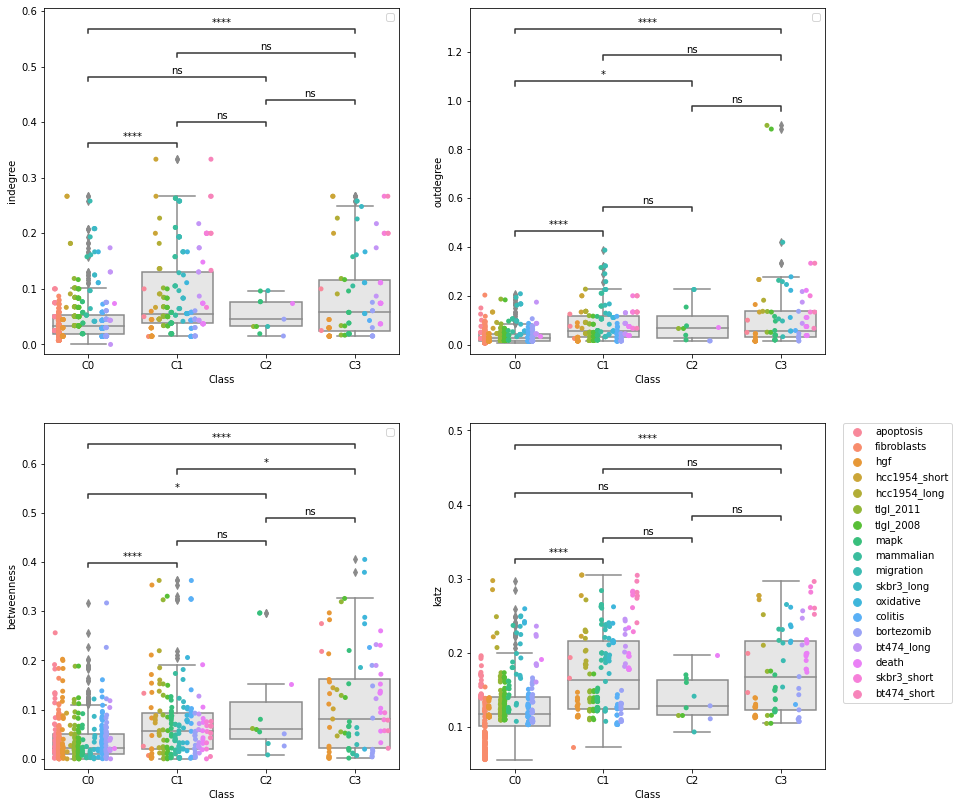

In [5]:
f, axes = plt.subplots(2, 2, figsize=(14, 14))
full_box_pairs =[("C0", "C1"), ("C0", "C2"), ("C0", "C3"), ("C1", "C2"), ("C1", "C3"), ("C2", "C3")]
sns.stripplot(data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='indegree', hue='network', ax=axes[0,0], dodge=True, jitter=True)
ax = sns.boxplot(data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='indegree', color='.9', ax=axes[0,0])
add_stat_annotation(ax=ax, data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='indegree',
                    box_pairs=full_box_pairs,
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
sns.stripplot(data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='outdegree', hue='network', ax=axes[0,1], dodge=True, jitter=True)
ax = sns.boxplot(data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='outdegree', color='.9', ax=axes[0,1])
add_stat_annotation(ax=ax, data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='outdegree',
                    box_pairs=full_box_pairs,
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
sns.stripplot(data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='betweenness', hue='network', ax=axes[1,0], dodge=True, jitter=True)
ax = sns.boxplot(data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='betweenness', color='.9', ax=axes[1,0])
add_stat_annotation(ax=ax, data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='betweenness',
                    box_pairs=full_box_pairs,
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
sns.stripplot(data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='katz', hue='network', ax=axes[1,1], dodge=True, jitter=True)
ax = sns.boxplot(data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='katz', color='.9', ax=axes[1,1])

add_stat_annotation(ax=ax, data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='katz',
                    box_pairs=full_box_pairs,
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)

handles, labels = ax.get_legend_handles_labels()
length_label = len(labels)
l = plt.legend(handles[length_label-18:length_label], labels[length_label-18:length_label], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axes[0,0].legend(handles[:0], labels[:0])
axes[0,1].legend(handles[:0], labels[:0])
axes[1,0].legend(handles[:0], labels[:0])
# axes[0,1].legend(handles[:0], labels[:0])

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

C0 v.s. C1: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.559e-14 U_stat=2.043e+04
C1 v.s. C2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.157e+03
C2 v.s. C3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.005e+02
C0 v.s. C2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.907e-01 U_stat=1.542e+03
C1 v.s. C3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=7.480e+03
C0 v.s. C3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.201e-05 U_stat=1.081e+04
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

C0 v.s. C1: 

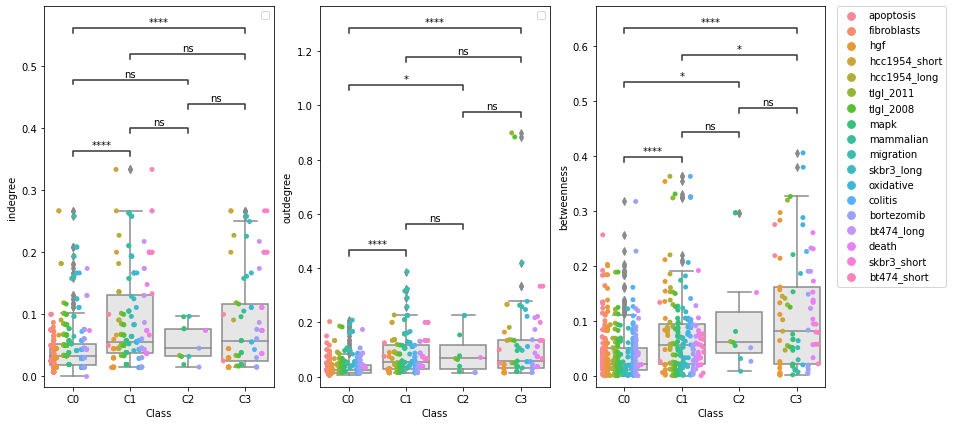

In [6]:
f, axes = plt.subplots(1, 3, figsize=(14, 7))
full_box_pairs =[("C0", "C1"), ("C0", "C2"), ("C0", "C3"), ("C1", "C2"), ("C1", "C3"), ("C2", "C3")]
sns.stripplot(data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='indegree', hue='network', ax=axes[0], dodge=True, jitter=True)
ax = sns.boxplot(data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='indegree', color='.9', ax=axes[0])
add_stat_annotation(ax=ax, data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='indegree',
                    box_pairs=full_box_pairs,
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
sns.stripplot(data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='outdegree', hue='network', ax=axes[1], dodge=True, jitter=True)
ax = sns.boxplot(data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='outdegree', color='.9', ax=axes[1])
add_stat_annotation(ax=ax, data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='outdegree',
                    box_pairs=full_box_pairs,
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
sns.stripplot(data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='betweenness', hue='network', ax=axes[2], dodge=True, jitter=True)
ax = sns.boxplot(data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='betweenness', color='.9', ax=axes[2])
add_stat_annotation(ax=ax, data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='betweenness',
                    box_pairs=full_box_pairs,
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
# sns.stripplot(data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='katz', hue='network', ax=axes[1,1], dodge=True, jitter=True)
# ax = sns.boxplot(data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='katz', color='.9', ax=axes[1,1])

# add_stat_annotation(ax=ax, data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='katz',
#                     box_pairs=full_box_pairs,
#                     test='Mann-Whitney', text_format='star', loc='inside', verbose=2)

handles, labels = ax.get_legend_handles_labels()
length_label = len(labels)
l = plt.legend(handles[length_label-18:length_label], labels[length_label-18:length_label], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axes[0].legend(handles[:0], labels[:0])
axes[1].legend(handles[:0], labels[:0])
# axes[1,0].legend(handles[:0], labels[:0])
# axes[0,1].legend(handles[:0], labels[:0])

In [7]:
df_plot = integrated_data.groupby(['network', 'Class']).size().reset_index().pivot(columns='Class', index='network', values=0)

In [8]:
df_freq_plot = df_plot.fillna(0.0)
df_freq_plot = df_freq_plot.div(df_freq_plot.sum(axis=1), axis=0)
print(df_freq_plot.head())

Class              C0        C1        C2        C3
network                                            
apoptosis    0.894737  0.052632  0.000000  0.052632
bortezomib   0.627119  0.203390  0.033898  0.135593
bt474_long   0.388889  0.444444  0.000000  0.166667
bt474_short  0.000000  0.666667  0.000000  0.333333
colitis      0.776119  0.208955  0.000000  0.014925


<AxesSubplot:xlabel='network'>

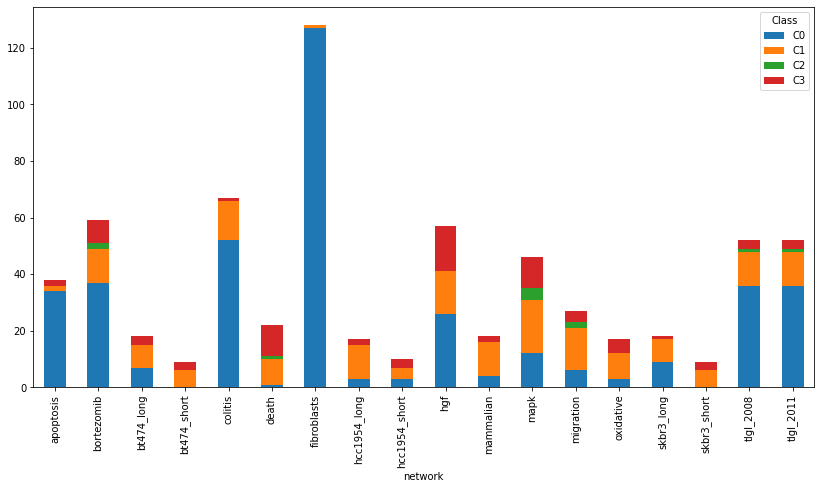

In [9]:
df_plot.plot.bar(stacked=True, figsize=(14,7))

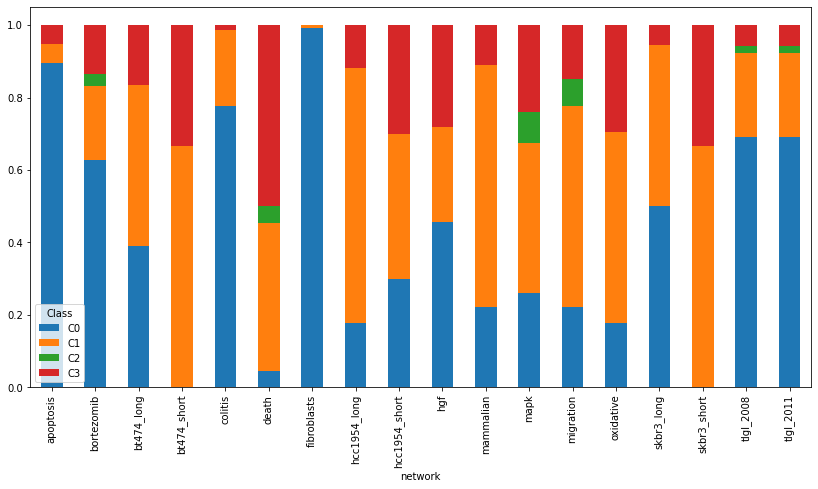

In [11]:
df_freq_plot.plot.bar(stacked=True, figsize=(14,7))
plt.savefig('figure_1B.pdf')

In [11]:
io_dict = dict()
for Model in networkModel:
    Prefix, Suffix = 'n', 'n'
    TEMP = jR.cellcollective(Model, Prefix, Suffix, directory='../')

    BooleanRuleFileName = TEMP['BooleanRule_filename']
    network_name = TEMP['network_name']

    NumInputs = TEMP['num_inputs']
    NumInputConditions = TEMP['num_input_conditions']

    InputConditions = TEMP['input_conditions']

    OutputNodes = TEMP['output_nodes']
    InputNodes = TEMP['input_nodes']
    
    Mapping = TEMP['mapping']
    InverseMapping = TEMP['inverse_mapping']
    GRead = TEMP['Gread']
    ReadNodes = TEMP['read_nodes']
    with open('../data/' + network_name + '_IO.txt', 'r') as f:
        temp = f.readline()
        io = eval(temp)
        empty_io = [x for x in io if len(x) == 0]
        len_io = [len(x) for x in io]
        io_dict[network_name] = {'num_input_conditions': NumInputConditions,
                                'num_output_nodes': len(OutputNodes),
                                'num_empty_io': len(empty_io),
                                'sum_io': sum(len_io)}

In [12]:
io_df = pd.DataFrame.from_dict(io_dict, orient='index')
io_df['empty_io_ratio'] = io_df['num_empty_io'] / io_df['num_input_conditions']
io_df['deterministic_io_ratio'] = io_df['sum_io'] / (io_df['num_input_conditions'] * io_df['num_output_nodes'])

<AxesSubplot:>

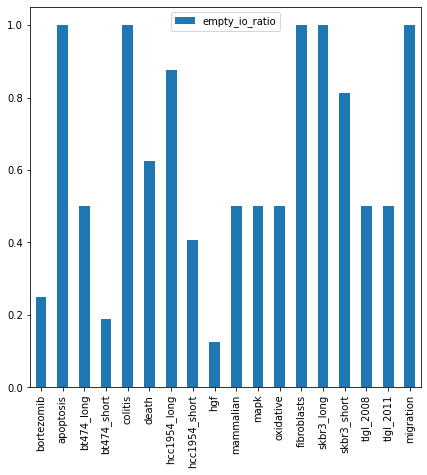

In [13]:
io_df.plot.bar(y='empty_io_ratio', figsize=(7,7))

<AxesSubplot:>

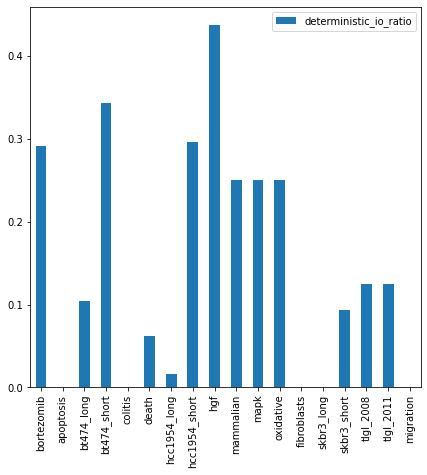

In [14]:
io_df.plot.bar(y='deterministic_io_ratio', figsize=(7,7))

In [15]:
test = pd.concat([io_df, df_freq_plot], axis=1)

In [16]:
test['C1C2'] = test['C1'] + test['C2']

In [17]:
df_freq_melt = pd.melt(df_freq_plot.reset_index(), id_vars='network').set_index('network')
test_melt = io_df.join(df_freq_melt, how='left')

In [18]:
test_melt['num_input_nodes'] = np.log2(test_melt['num_input_conditions'])

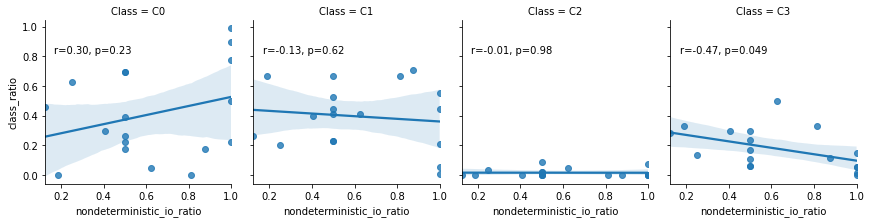

In [19]:
import scipy as sp

g = sns.lmplot(x='empty_io_ratio', y='value', data=test_melt, col='Class',
               height=3, aspect=1)

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['empty_io_ratio'], data['value'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
g.set_axis_labels("nondeterministic_io_ratio", "class_ratio")
plt.show()

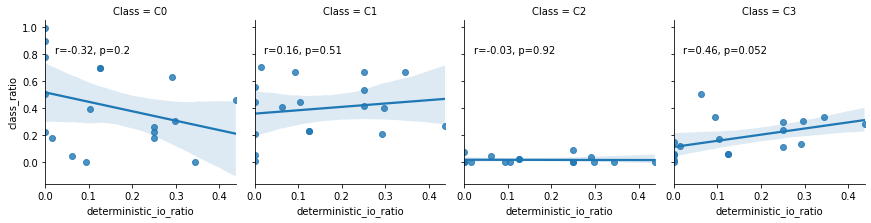

In [20]:
g = sns.lmplot(x='deterministic_io_ratio', y='value', data=test_melt, col='Class',
               height=3, aspect=1)

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['deterministic_io_ratio'], data['value'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
g.set_axis_labels("deterministic_io_ratio", "class_ratio")
plt.show()

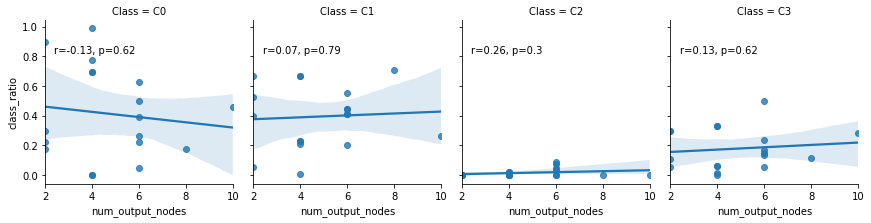

In [21]:
x_val = 'num_output_nodes'
g = sns.lmplot(x=x_val, y='value', data=test_melt, col='Class',
               height=3, aspect=1)

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data[x_val], data['value'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
g.set_axis_labels(x_val, "class_ratio")
plt.show()

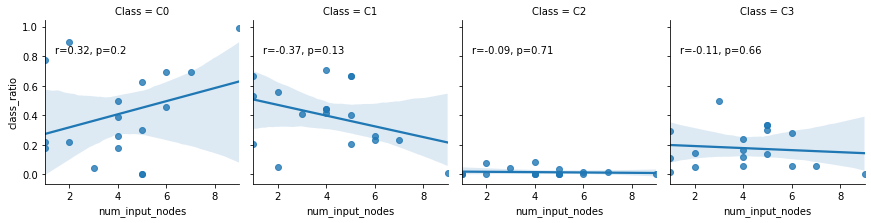

In [22]:
x_val = 'num_input_nodes'
g = sns.lmplot(x=x_val, y='value', data=test_melt, col='Class',
               height=3, aspect=1, logx=False)

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data[x_val], data['value'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
g.set_axis_labels(x_val, "class_ratio")
plt.show()

In [23]:
# test_melt

In [24]:
# functional_redundancy_df = pd.read_csv('../io_pathway_counts_cellCollective2.csv').T
# functional_redundancy_df = functional_redundancy_df.rename(columns={0: 'path_count'})
# test_melt_2 = test_melt.join(functional_redundancy_df)
# print(test_melt_2.head(10))

In [25]:
# x_val = 'path_count'
# g = sns.lmplot(x=x_val, y='value', data=test_melt_2, col='Class',
#                height=3, aspect=1, logx=True)

# def annotate(data, **kws):
#     r, p = sp.stats.pearsonr(data[x_val], data['value'])
#     ax = plt.gca()
#     ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
#             transform=ax.transAxes)
    
# g.map_dataframe(annotate)
# g.set_axis_labels(x_val, "class_ratio")
# plt.show()

In [26]:
# functional_redundancy_df_2 = functional_redundancy_df[functional_redundancy_df['path_count'] != 0]
# test_melt_3 = functional_redundancy_df_2.join(test_melt)

# x_val = 'path_count'
# g = sns.lmplot(x=x_val, y='value', data=test_melt_3, col='Class',
#                height=3, aspect=1, logx=True)

# def annotate(data, **kws):
#     r, p = sp.stats.pearsonr(data[x_val], data['value'])
#     ax = plt.gca()
#     ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
#             transform=ax.transAxes)
    
# g.map_dataframe(annotate)
# g.set_axis_labels(x_val, "class_ratio")
# plt.show()
# sns.relplot(x=x_val, y='value', data=test_melt_3, col='Class',
#                height=3, aspect=1, kind='scatter')

In [27]:
# functional_redundancy_df_3 = functional_redundancy_df_2[functional_redundancy_df_2['path_count'] < 1000]
# test_melt_4 = functional_redundancy_df_3.join(test_melt)

# x_val = 'path_count'
# g = sns.lmplot(x=x_val, y='value', data=test_melt_4, col='Class',
#                height=3, aspect=1, logx=False)

# def annotate(data, **kws):
#     r, p = sp.stats.pearsonr(data[x_val], data['value'])
#     ax = plt.gca()
#     ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
#             transform=ax.transAxes)
    
# g.map_dataframe(annotate)
# g.set_axis_labels(x_val, "class_ratio")
# plt.show()
# sns.relplot(x=x_val, y='value', data=test_melt_4, col='Class',
#                height=3, aspect=1, kind='scatter')

In [28]:
# functional_redundancy_df = pd.read_csv('../io_pathway_counts_cellCollective3.csv').T
# functional_redundancy_df = functional_redundancy_df.rename(columns={0: 'path_count'})
# test_melt_temp = test_melt.join(functional_redundancy_df)

# x_val = 'path_count'
# g = sns.lmplot(x=x_val, y='value', data=test_melt_temp, col='Class',
#                height=3, aspect=1, logx=True)

# def annotate(data, **kws):
#     r, p = sp.stats.pearsonr(data[x_val], data['value'])
#     ax = plt.gca()
#     ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
#             transform=ax.transAxes)
    
# g.map_dataframe(annotate)
# g.set_axis_labels(x_val, "class_ratio")
# plt.show()
# sns.relplot(x=x_val, y='value', data=test_melt_temp, col='Class',
#                height=3, aspect=1, kind='scatter')

In [29]:
# functional_redundancy_df_2 = functional_redundancy_df[functional_redundancy_df['path_count'] != 0]
# test_melt_3 = functional_redundancy_df_2.join(test_melt)

# x_val = 'path_count'
# g = sns.lmplot(x=x_val, y='value', data=test_melt_3, col='Class',
#                height=3, aspect=1, logx=True)

# def annotate(data, **kws):
#     r, p = sp.stats.pearsonr(data[x_val], data['value'])
#     ax = plt.gca()
#     ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
#             transform=ax.transAxes)
    
# g.map_dataframe(annotate)
# g.set_axis_labels(x_val, "class_ratio")
# plt.show()
# sns.relplot(x=x_val, y='value', data=test_melt_3, col='Class',
#                height=3, aspect=1, kind='scatter')

In [30]:
# functional_redundancy_df = pd.read_csv('../io_pathway_counts_cellCollective4.csv').T
# functional_redundancy_df = functional_redundancy_df.rename(columns={0: 'path_count'})
# test_melt_temp = test_melt.join(functional_redundancy_df)

# x_val = 'path_count'
# g = sns.lmplot(x=x_val, y='value', data=test_melt_temp, col='Class',
#                height=3, aspect=1, logx=True)

# def annotate(data, **kws):
#     r, p = sp.stats.pearsonr(data[x_val], data['value'])
#     ax = plt.gca()
#     ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
#             transform=ax.transAxes)
    
# g.map_dataframe(annotate)
# g.set_axis_labels(x_val, "class_ratio")
# plt.show()
# sns.relplot(x=x_val, y='value', data=test_melt_temp, col='Class',
#                height=3, aspect=1, kind='scatter')

In [31]:
# functional_redundancy_df_2 = functional_redundancy_df[functional_redundancy_df['path_count'] >= 0]
# test_melt_3 = functional_redundancy_df_2.join(test_melt)

# x_val = 'path_count'
# g = sns.lmplot(x=x_val, y='value', data=test_melt_3, col='Class',
#                height=3, aspect=1, logx=True)

# def annotate(data, **kws):
#     r, p = sp.stats.pearsonr(data[x_val], data['value'])
#     ax = plt.gca()
#     ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
#             transform=ax.transAxes)
    
# g.map_dataframe(annotate)
# g.set_axis_labels(x_val, "class_ratio")
# plt.show()
# sns.relplot(x=x_val, y='value', data=test_melt_3, col='Class',
#                height=3, aspect=1, kind='scatter')

/home/jijoo/miniconda3/envs/theor/lib/python3.8/site-packages/seaborn/regression.py:301: RuntimeWarning: invalid value encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]
/home/jijoo/miniconda3/envs/theor/lib/python3.8/site-packages/seaborn/regression.py:304: RuntimeWarning: invalid value encountered in log
  _x = np.c_[_x[:, 0], np.log(_x[:, 1])]
/home/jijoo/miniconda3/envs/theor/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/jijoo/miniconda3/envs/theor/lib/python3.8/site-packages/seaborn/regression.py:301: RuntimeWarning: invalid value encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]
/home/jijoo/miniconda3/envs/theor/lib/python3.8/site-packages/seaborn/regression.py:304: RuntimeWarning: invalid value encountered in log
  _x = np.c_[_x[:, 0], np.log(_x[:, 1])]
/home/jijoo/miniconda3/envs/theor/lib/python3.8/site-packages/numpy/lib/

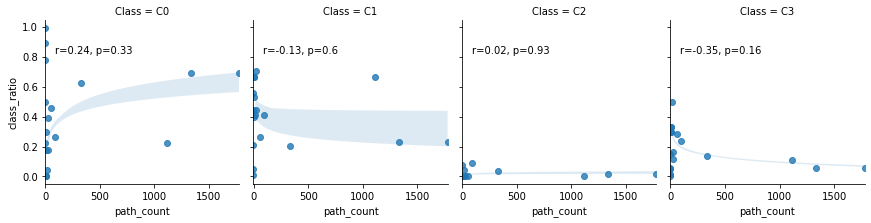

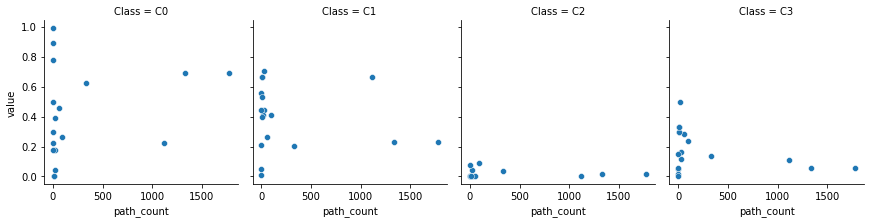

In [32]:
functional_redundancy_df = pd.read_csv('../io_pathway_counts_cellCollective5.csv').T
functional_redundancy_df = functional_redundancy_df.rename(columns={0: 'path_count'})
test_melt_temp = test_melt.join(functional_redundancy_df)

x_val = 'path_count'
g = sns.lmplot(x=x_val, y='value', data=test_melt_temp, col='Class',
               height=3, aspect=1, logx=True)

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data[x_val], data['value'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
g.set_axis_labels(x_val, "class_ratio")
plt.show()
sns.relplot(x=x_val, y='value', data=test_melt_temp, col='Class',
               height=3, aspect=1, kind='scatter')

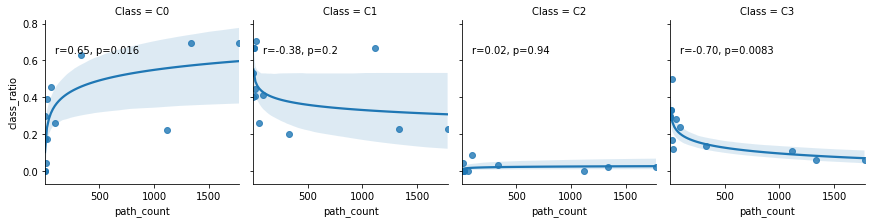

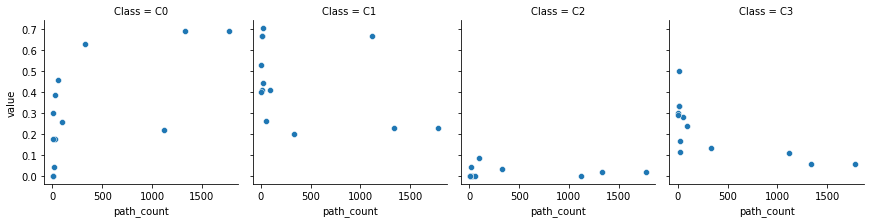

In [33]:
functional_redundancy_df_2 = functional_redundancy_df[functional_redundancy_df['path_count'] >= 0]
test_melt_3 = functional_redundancy_df_2.join(test_melt)

x_val = 'path_count'
g = sns.lmplot(x=x_val, y='value', data=test_melt_3, col='Class',
               height=3, aspect=1, logx=True)

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data[x_val], data['value'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
g.set_axis_labels(x_val, "class_ratio")
plt.show()
sns.relplot(x=x_val, y='value', data=test_melt_3, col='Class',
               height=3, aspect=1, kind='scatter')

In [34]:
# functional_redundancy_df = pd.read_csv('../io_pathway_counts_cellCollective7.csv').T
# functional_redundancy_df = functional_redundancy_df.rename(columns={0: 'path_count'})
# test_melt_temp = test_melt.join(functional_redundancy_df)

# functional_redundancy_df_2 = functional_redundancy_df[functional_redundancy_df['path_count'] >= 0]
# test_melt_3 = functional_redundancy_df_2.join(test_melt)

# x_val = 'path_count'
# g = sns.lmplot(x=x_val, y='value', data=test_melt_3, col='Class',
#                height=3, aspect=1, logx=True)

# def annotate(data, **kws):
#     r, p = sp.stats.pearsonr(data[x_val], data['value'])
#     ax = plt.gca()
#     ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
#             transform=ax.transAxes)
    
# g.map_dataframe(annotate)
# g.set_axis_labels(x_val, "class_ratio")
# plt.show()
# sns.relplot(x=x_val, y='value', data=test_melt_3, col='Class',
#                height=3, aspect=1, kind='scatter')

            num_nodes  C0_num  C0_cycle  C1_num  C1_cycle  C2_num  C2_cycle  \
network                                                                       
bortezomib         67      37         3      12         0       2         0   
apoptosis          41      34         6       2         1       0         0   
bt474_long         25       7         1       8         0       0         0   
colitis            70      52        27      14         0       0         0   
death              28       1         0       9         0       1         0   

            C3_num  C3_cycle  
network                       
bortezomib       8         0  
apoptosis        2         0  
bt474_long       3         0  
colitis          1         0  
death           11         2  


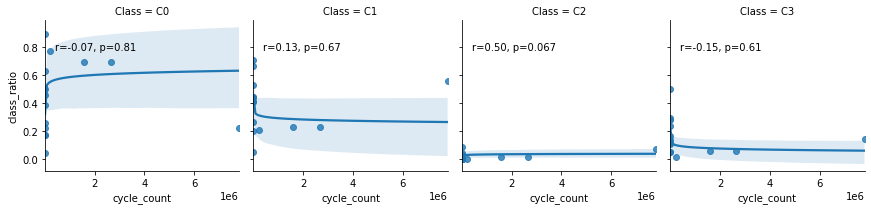

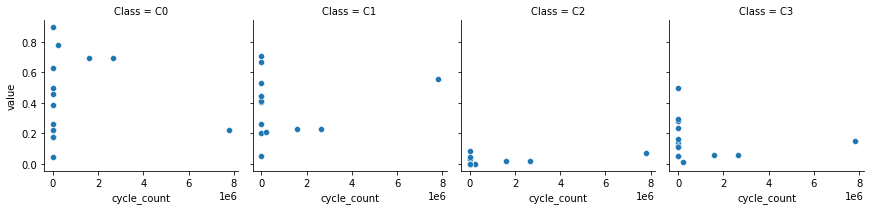

In [35]:
cycle_df = pd.read_csv('../minimum_cycle_cellCollective.csv').T
cycle_df = cycle_df.rename(columns={0: 'cycle_count'})

class_cycle_df = pd.read_csv('../class_cycle_num_cellCollective.csv').set_index('network').drop(columns=['Unnamed: 0'])
print(class_cycle_df.head())

test_melt_cycle = test_melt.join(cycle_df)
test_melt_cycle = test_melt_cycle.join(class_cycle_df)

#todo
#cycle ratio columns 만들기
test_melt_cycle['C0_cycle_ratio'] = test_melt_cycle['C0_cycle'] / test_melt_cycle['cycle_count']
test_melt_cycle['C1_cycle_ratio'] = test_melt_cycle['C1_cycle'] / test_melt_cycle['cycle_count']
test_melt_cycle['C2_cycle_ratio'] = test_melt_cycle['C2_cycle'] / test_melt_cycle['cycle_count']
test_melt_cycle['C3_cycle_ratio'] = test_melt_cycle['C3_cycle'] / test_melt_cycle['cycle_count']
#cycle_count 에 대한, class_cycle_ratio 에 대한 graph 

test_melt_cycle = test_melt_cycle.drop(['bt474_short', 'hcc1954_short',  'fibroblasts', 'skbr3_short'])

x_val = 'cycle_count'
g = sns.lmplot(x=x_val, y='value', data=test_melt_cycle, col='Class',
               height=3, aspect=1, logx=True)

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data[x_val], data['value'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
g.set_axis_labels(x_val, "class_ratio")
plt.show()
sns.relplot(x=x_val, y='value', data=test_melt_cycle, col='Class',
               height=3, aspect=1, kind='scatter')

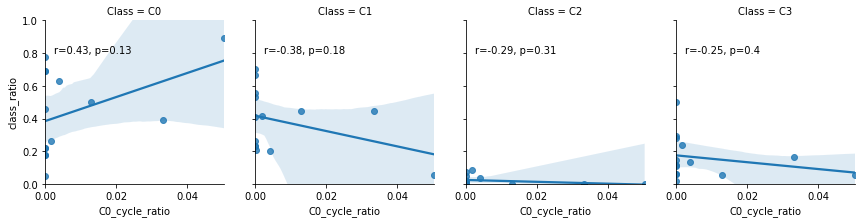

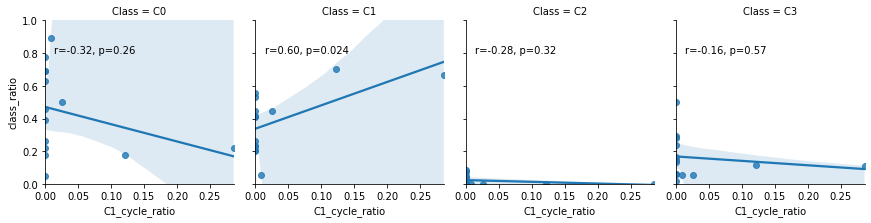

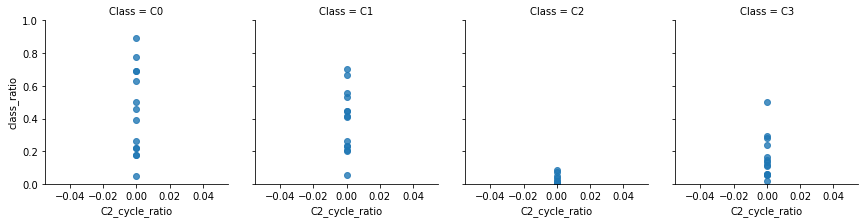

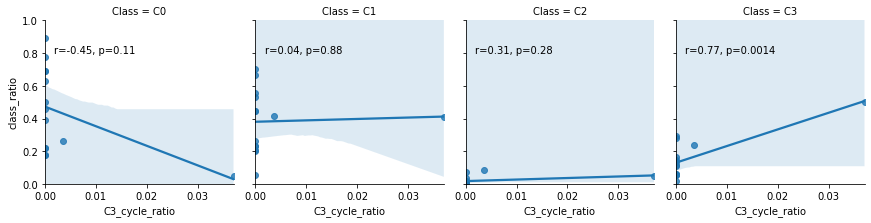

In [36]:
x_val = 'C0_cycle_ratio'
g = sns.lmplot(x=x_val, y='value', data=test_melt_cycle, col='Class',
               height=3, aspect=1, logx=False)
g.set(ylim=(0, 1))
g.map_dataframe(annotate)
g.set_axis_labels(x_val, "class_ratio")
x_val = 'C1_cycle_ratio'
g = sns.lmplot(x=x_val, y='value', data=test_melt_cycle, col='Class',
               height=3, aspect=1, logx=False)
g.set(ylim=(0, 1))
g.map_dataframe(annotate)
g.set_axis_labels(x_val, "class_ratio")
x_val = 'C2_cycle_ratio'
g = sns.lmplot(x=x_val, y='value', data=test_melt_cycle, col='Class',
               height=3, aspect=1, logx=False)
g.set(ylim=(0, 1))
g.set_axis_labels(x_val, "class_ratio")
x_val = 'C3_cycle_ratio'
g = sns.lmplot(x=x_val, y='value', data=test_melt_cycle, col='Class',
               height=3, aspect=1, logx=False)
g.set(ylim=(0, 1))
g.map_dataframe(annotate)
g.set_axis_labels(x_val, "class_ratio")

            num_nodes  C0_num  del_C0_cycle  C1_num  del_C1_cycle  C2_num  \
network                                                                     
bortezomib         67      22             0      47           228      57   
apoptosis          41       4             5      36            19      38   
bt474_long         25      11            11      10             1      18   
colitis            70      15             1      53            27      67   
death              28      21            54      13             2      21   

            del_C2_cycle  C3_num  del_C3_cycle  
network                                         
bortezomib           258      51            10  
apoptosis            119      36             8  
bt474_long            30      15             1  
colitis           208721      66         13005  
death                 13      11             0  


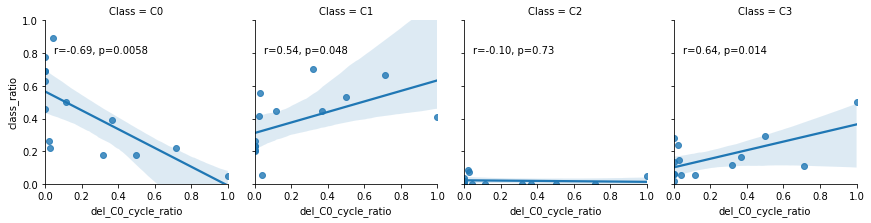

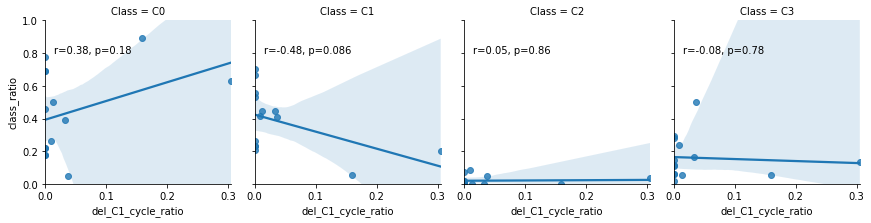

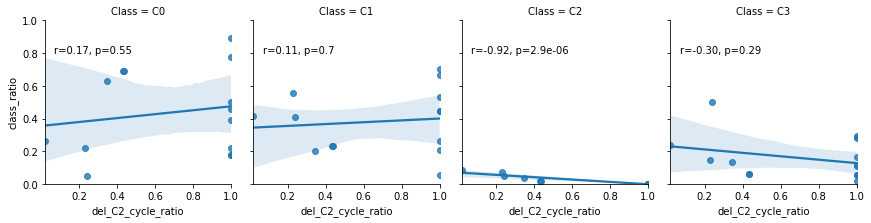

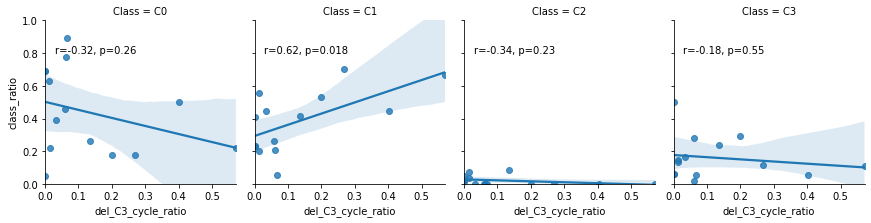

In [37]:
cycle_df = pd.read_csv('../minimum_cycle_cellCollective.csv').T
cycle_df = cycle_df.rename(columns={0: 'cycle_count'})

class_cycle_df = pd.read_csv('../class_cycle_num_cellCollective_2.csv').set_index('network').drop(columns=['Unnamed: 0'])
print(class_cycle_df.head())

test_melt_cycle = test_melt.join(cycle_df)
test_melt_cycle = test_melt_cycle.join(class_cycle_df)

#todo
#cycle ratio columns 만들기
test_melt_cycle['del_C0_cycle_ratio'] = test_melt_cycle['del_C0_cycle'] / test_melt_cycle['cycle_count']
test_melt_cycle['del_C1_cycle_ratio'] = test_melt_cycle['del_C1_cycle'] / test_melt_cycle['cycle_count']
test_melt_cycle['del_C2_cycle_ratio'] = test_melt_cycle['del_C2_cycle'] / test_melt_cycle['cycle_count']
test_melt_cycle['del_C3_cycle_ratio'] = test_melt_cycle['del_C3_cycle'] / test_melt_cycle['cycle_count']
#cycle_count 에 대한, class_cycle_ratio 에 대한 graph 

test_melt_cycle = test_melt_cycle.drop(['bt474_short', 'hcc1954_short',  'fibroblasts', 'skbr3_short'])

x_val = 'del_C0_cycle_ratio'
g = sns.lmplot(x=x_val, y='value', data=test_melt_cycle, col='Class',
               height=3, aspect=1, logx=False)
g.set(ylim=(0, 1))
g.map_dataframe(annotate)
g.set_axis_labels(x_val, "class_ratio")
x_val = 'del_C1_cycle_ratio'
g = sns.lmplot(x=x_val, y='value', data=test_melt_cycle, col='Class',
               height=3, aspect=1, logx=False)
g.set(ylim=(0, 1))
g.map_dataframe(annotate)
g.set_axis_labels(x_val, "class_ratio")
x_val = 'del_C2_cycle_ratio'
g = sns.lmplot(x=x_val, y='value', data=test_melt_cycle, col='Class',
               height=3, aspect=1, logx=False)
g.set(ylim=(0, 1))
g.map_dataframe(annotate)
g.set_axis_labels(x_val, "class_ratio")
x_val = 'del_C3_cycle_ratio'
g = sns.lmplot(x=x_val, y='value', data=test_melt_cycle, col='Class',
               height=3, aspect=1, logx=False)
g.set(ylim=(0, 1))
g.map_dataframe(annotate)
g.set_axis_labels(x_val, "class_ratio")

In [68]:
robustness_df = pd.read_csv('../data/robustness_cellCollective_2_15.csv', index_col=0)
print(robustness_df.head())
robustness_pivot = pd.pivot_table(robustness_df, index='network', values='robustness', aggfunc='mean')

      network  node mut  robustness
0  bortezomib     0  oe         1.0
1  bortezomib     0  ko         0.0
2  bortezomib     1  oe         0.0
3  bortezomib     1  ko         0.0
4  bortezomib     2  oe         1.0


In [69]:
test_melt_robustness = test_melt_3.join(robustness_pivot).dropna(axis=0)
# test_melt_robustness=test_melt_robustness.drop(['bt474_short', 'hcc1954_short',  'fibroblasts', 'skbr3_short'])
test_melt_robustness.head()

,path_count,num_input_conditions,num_output_nodes,num_empty_io,sum_io,empty_io_ratio,deterministic_io_ratio,Class,value,num_input_nodes,robustness
bortezomib,330.371429,32,6,8,56,0.25,0.291667,C0,0.627119,5.0,0.671642
bortezomib,330.371429,32,6,8,56,0.25,0.291667,C1,0.203390,5.0,0.671642
bortezomib,330.371429,32,6,8,56,0.25,0.291667,C2,0.033898,5.0,0.671642
bortezomib,330.371429,32,6,8,56,0.25,0.291667,C3,0.135593,5.0,0.671642
bt474_long,22.400000,16,6,8,10,0.50,0.104167,C0,0.388889,4.0,0.660000


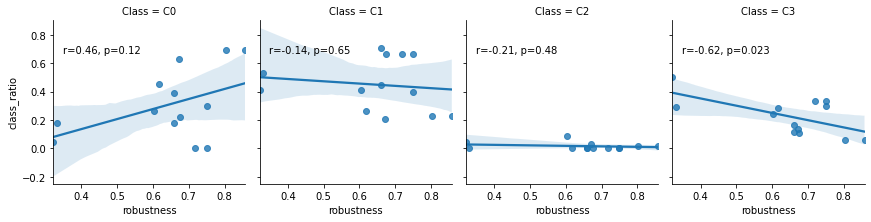

In [71]:
x_val = 'robustness'
y_val = 'value'
# temp = test_melt_robustness[x_val, y_val].un
g = sns.lmplot(x=x_val, y=y_val, data=test_melt_robustness, col='Class',
               height=3, aspect=1, logx=False)
# g.set(ylim=(0, 1))
def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data[x_val], data[y_val])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
g.map_dataframe(annotate)
g.set_axis_labels(x_val, "class_ratio")

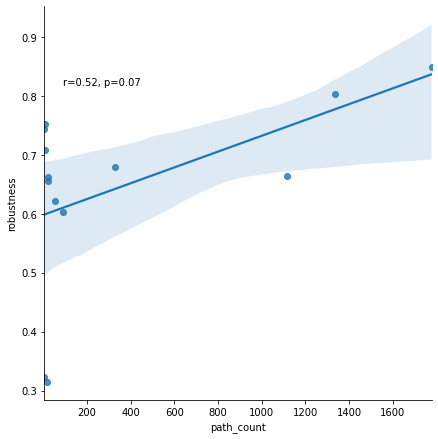

In [75]:
x_val = 'path_count'
g = sns.lmplot(x=x_val, y='robustness', data=test_melt_robustness[['path_count', 'robustness']].drop_duplicates(),
               height=6, aspect=1, logx=False, markers='o', x_jitter=0.01, y_jitter=0.01)

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data[x_val], data['robustness'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
g.set_axis_labels(x_val, "robustness")
plt.show()

In [76]:
robustness_df = pd.read_csv('../data/robustness_initial_perturbation_cellCollective_2_15.csv', index_col=0)
print(robustness_df.head())
robustness_pivot = pd.pivot_table(robustness_df, index='network', values='robustness')

       network  robustness
0   bortezomib    0.924604
1    apoptosis    0.830994
2   bt474_long    0.620863
3  bt474_short    0.641350
4      colitis    0.853786


In [81]:
test_melt_robustness = test_melt_3.join(robustness_pivot).dropna(axis=0)
test_melt_robustness.head()

,path_count,num_input_conditions,num_output_nodes,num_empty_io,sum_io,empty_io_ratio,deterministic_io_ratio,Class,value,num_input_nodes,robustness
bortezomib,330.371429,32,6,8,56,0.25,0.291667,C0,0.627119,5.0,0.924604
bortezomib,330.371429,32,6,8,56,0.25,0.291667,C1,0.203390,5.0,0.924604
bortezomib,330.371429,32,6,8,56,0.25,0.291667,C2,0.033898,5.0,0.924604
bortezomib,330.371429,32,6,8,56,0.25,0.291667,C3,0.135593,5.0,0.924604
bt474_long,22.400000,16,6,8,10,0.50,0.104167,C0,0.388889,4.0,0.620863


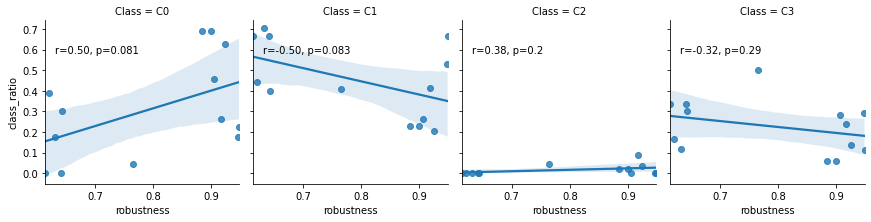

In [82]:
x_val = 'robustness'
g = sns.lmplot(x=x_val, y='value', data=test_melt_robustness, col='Class',
               height=3, aspect=1, logx=False)
def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data[x_val], data['value'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
# g.set(ylim=(0, 1))
g.map_dataframe(annotate)
g.set_axis_labels(x_val, "class_ratio")

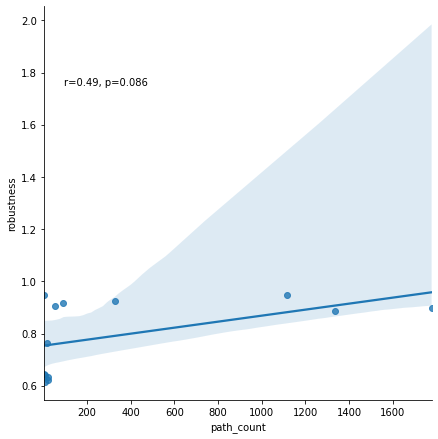

In [83]:
x_val = 'path_count'
g = sns.lmplot(x=x_val, y='robustness', data=test_melt_robustness[['path_count', 'robustness']].drop_duplicates(),
               height=6, aspect=1, logx=False)

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data[x_val], data['robustness'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
g.set_axis_labels(x_val, "robustness")
plt.show()

In [80]:
test_melt_robustness[['path_count', 'robustness']].drop_duplicates()

,path_count,robustness
bortezomib,330.371429,0.924604
bt474_long,22.400000,0.620863
bt474_short,8.709091,0.641350
death,16.000000,0.765031
hcc1954_long,24.250000,0.632037
hcc1954_short,4.600000,0.643036
hgf,56.066667,0.905566
mammalian,1117.000000,0.948611
mapk,92.666667,0.917506
oxidative,5.000000,0.947368


In [64]:
robustness_df = pd.read_csv('../data/robustness_perturbation_cellCollective_2_15.csv', index_col=0)
print(robustness_df.head())
robustness_pivot = pd.pivot_table(robustness_df, index='network', values='robustness')
test_melt_robustness = test_melt_3.join(robustness_pivot).dropna(axis=0)
test_melt_robustness.head()

       network  robustness
0   bortezomib         1.0
1    apoptosis         1.0
2   bt474_long         1.0
3  bt474_short         1.0
4      colitis         1.0


,path_count,num_input_conditions,num_output_nodes,num_empty_io,sum_io,empty_io_ratio,deterministic_io_ratio,Class,value,num_input_nodes,robustness
bortezomib,330.371429,32,6,8,56,0.25,0.291667,C0,0.627119,5.0,1.0
bortezomib,330.371429,32,6,8,56,0.25,0.291667,C1,0.203390,5.0,1.0
bortezomib,330.371429,32,6,8,56,0.25,0.291667,C2,0.033898,5.0,1.0
bortezomib,330.371429,32,6,8,56,0.25,0.291667,C3,0.135593,5.0,1.0
bt474_long,22.400000,16,6,8,10,0.50,0.104167,C0,0.388889,4.0,1.0


In [65]:
robustness_df

,network,robustness
0,bortezomib,1.0
1,apoptosis,1.0
2,bt474_long,1.0
3,bt474_short,1.0
4,colitis,1.0
5,death,1.0
6,hcc1954_long,1.0
7,hcc1954_short,1.0
8,hgf,1.0
9,mammalian,1.0


/home/jijoo/miniconda3/envs/theor/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


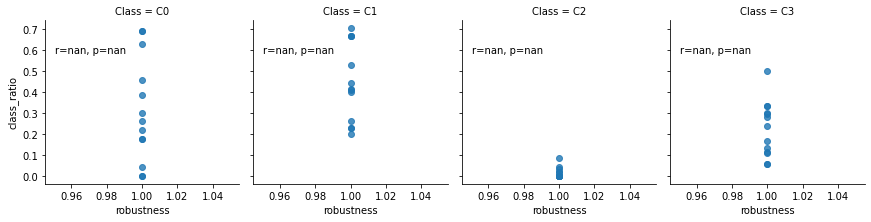

In [66]:
x_val = 'robustness'
g = sns.lmplot(x=x_val, y='value', data=test_melt_robustness, col='Class',
               height=3, aspect=1, logx=False)
# g.set(ylim=(0, 1))
g.map_dataframe(annotate)
g.set_axis_labels(x_val, "class_ratio")

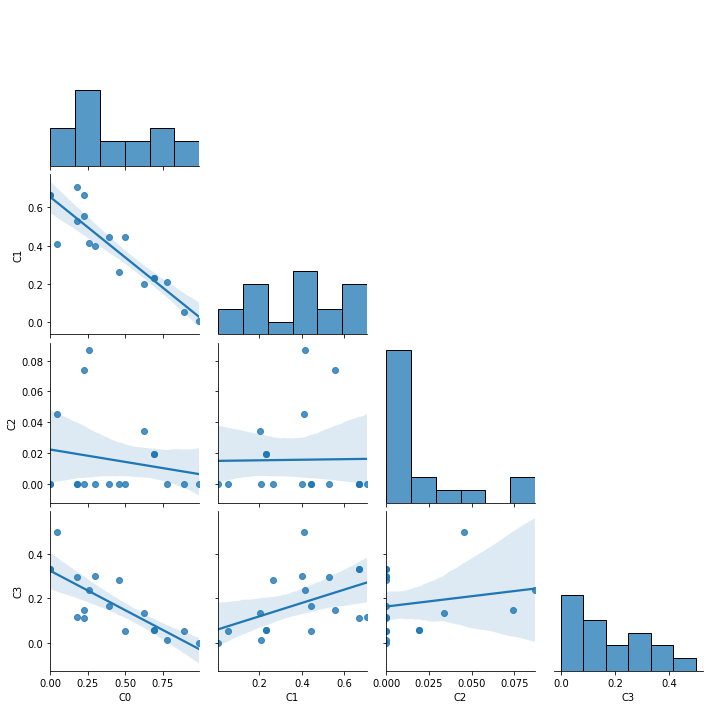

In [67]:
# g = sns.PairGrid(df_freq_plot)
# g.map_upper(sns.scatterplot)
# g.map_diag(sns.kdeplot, lw=3, legend=False)
# g.map_lower(sns.regplot)
sns.pairplot(df_freq_plot, kind='reg', corner=True)

In [85]:
test

,num_input_conditions,num_output_nodes,num_empty_io,sum_io,empty_io_ratio,deterministic_io_ratio,C0,C1,C2,C3,C1C2
bortezomib,32,6,8,56,0.25000,0.291667,0.627119,0.203390,0.033898,0.135593,0.237288
apoptosis,4,2,4,0,1.00000,0.000000,0.894737,0.052632,0.000000,0.052632,0.052632
bt474_long,16,6,8,10,0.50000,0.104167,0.388889,0.444444,0.000000,0.166667,0.444444
bt474_short,32,4,6,44,0.18750,0.343750,0.000000,0.666667,0.000000,0.333333,0.666667
colitis,2,4,2,0,1.00000,0.000000,0.776119,0.208955,0.000000,0.014925,0.208955
death,8,6,5,3,0.62500,0.062500,0.045455,0.409091,0.045455,0.500000,0.454545
hcc1954_long,16,8,14,2,0.87500,0.015625,0.176471,0.705882,0.000000,0.117647,0.705882
hcc1954_short,32,2,13,19,0.40625,0.296875,0.300000,0.400000,0.000000,0.300000,0.400000
hgf,64,10,8,280,0.12500,0.437500,0.456140,0.263158,0.000000,0.280702,0.263158
mammalian,2,2,1,1,0.50000,0.250000,0.222222,0.666667,0.000000,0.111111,0.666667


In [ ]:
# g = sns.PairGrid(test, x_vars=['empty_io_ratio', 'deterministic_io_ratio'], y_vars=['C0', 'C1', 'C2', 'C3'])
# g.map(sns.regplot)

# # def annotate(data, **kws):
# #     r, p = sp.stats.pearsonr(data['total_bill'], data['tip'])
# #     ax = plt.gca()
# #     ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
# #             transform=ax.transAxes)
    
# # g.set(ylim=(0, 1.1), yticks=[0, 0.25, 0.5, 0.75, 1.0])

# # fig, axes = plt.subplots(number_r,3, sharex=True, sharey=True, figsize=(15,number_r * 6))
# # #drug_ids = ['1916', '1924', '2170', '1940']
# # for idx, ax in enumerate(axes.flat):        
# #     #print(ax)
# #     if idx < len(drug_ids):
# #         sns.regplot(x=tmp_zscore[score], y=tmp_zscore[drug_ids[idx]], ax=ax)
# #         label_point(tmp_zscore, drug_ids[idx], ax)
# #         ax.set_xlabel('Score')
# #         ax.text(-2, 2, 'p-value=%.3f'% pearson_zscore.loc[int(drug_ids[idx])][score+'_pval'])
# #         ax.text(-2, 2.2, r'$R^2$=%.3f'% pearson_zscore.loc[int(drug_ids[idx])][score+'_corr'])
# #     else:
# #         break